In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# read from local
df_merge = pd.read_csv("data/joined_cac40_covid_data.csv", sep=";", header=0, parse_dates = ['Date'])

In [3]:
# read from hdfs
from hdfs import InsecureClient

hdfs_client = InsecureClient('http://localhost:9870')

with hdfs_client.read('/project/joined_cac40_covid_data.csv', encoding = 'utf-8') as reader:
    df_merge = pd.read_csv(reader, sep=';', header=0, parse_dates = ['Date'])

In [11]:
df_merge

,Date,Adj Close,hospitalized,in intensive care,returning home,deceased
0,2020-03-18,3754.840088,2972,771,816,218
1,2020-03-19,3855.500000,4073,1002,1180,327
2,2020-03-20,4048.800049,5226,1297,1587,450
3,2020-03-23,3914.310059,8673,2080,2567,860
4,2020-03-24,4242.700195,10176,2516,3281,1100
5,2020-03-25,4432.299805,12072,2935,4085,1388
6,2020-03-26,4543.580078,13879,3351,4947,1696
7,2020-03-27,4351.490234,15701,3758,5698,1995
8,2020-03-30,4378.509766,20946,5056,7923,3024
9,2020-03-31,4396.120117,22672,5496,9443,3523


In [12]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               39 non-null     datetime64[ns]
 1   Adj Close          39 non-null     float64       
 2   hospitalized       39 non-null     int64         
 3   in intensive care  39 non-null     int64         
 4   returning home     39 non-null     int64         
 5   deceased           39 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 2.0 KB


In [ ]:
# no null values found

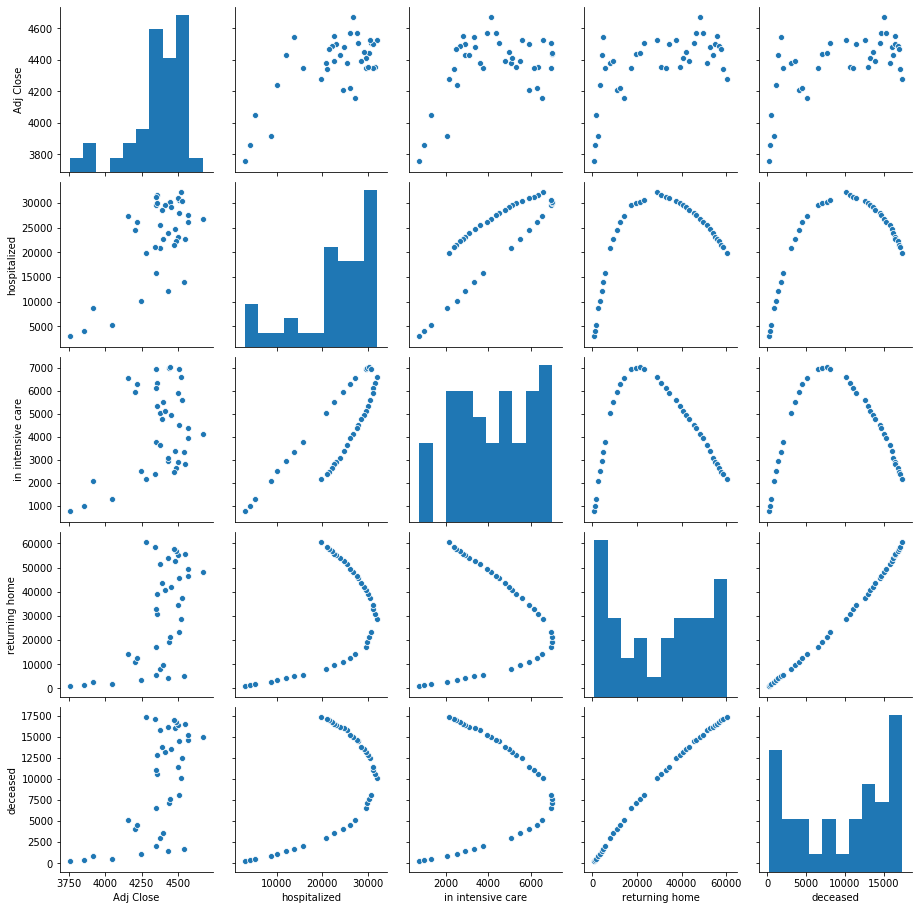

In [13]:
sns.pairplot(df_merge)

In [7]:
df_merge.corr()

,Adj Close,hospitalized,in intensive care,returning home,deceased
Adj Close,1.000000,0.679236,0.395049,0.591247,0.624568
hospitalized,0.679236,1.000000,0.823123,0.510914,0.585888
in intensive care,0.395049,0.823123,1.000000,-0.060317,0.026833
returning home,0.591247,0.510914,-0.060317,1.000000,0.995321
deceased,0.624568,0.585888,0.026833,0.995321,1.000000


In [ ]:
# The most interesting row is the Adj Close price of CAC40 correlated against covid infections measures.
# We observed that CAC 40 adjusted close price is most correlated with the number of covid hospitalizations.
# Besides that, we observed that returning home measure is strongly correlated with deceased measure,
# This is because after hosptitalization, people are either returning home or they die.

## One variable regression with seaborn

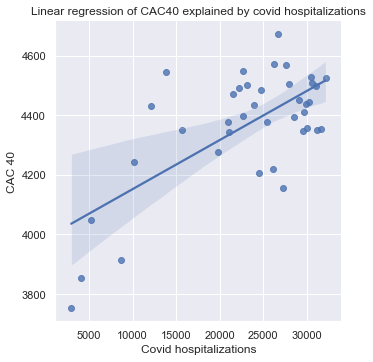

In [34]:
sns.set(style="darkgrid")
sns.lmplot(x="hospitalized", y="Adj Close", data=df_merge)
plt.ylabel('CAC 40')
plt.xlabel('Covid hospitalizations')
plt.title('Linear regression of CAC40 explained by covid hospitalizations')
plt.savefig('images/lr_cac40_covid.pdf')
plt.show()

In [ ]:
# We observe a relation between the number of covid hospitalization and cac 40 adjuted close price,
# However there is a lot of dispersion around the regression line

## Regression with scikit-learn

In [12]:
from sklearn import linear_model

In [37]:
covid_X = df_merge[['hospitalized']] # the predictor variable = 1 feature
cac40_y = df_merge['Adj Close'] # the target variable

In [41]:
# Split the predictors into training/testing sets
covid_X_train = covid_X[:-11]
covid_X_test = covid_X[-11:]

In [42]:
covid_X_train

,hospitalized
0,2972
1,4073
2,5226
3,8673
4,10176
5,12072
6,13879
7,15701
8,20946
9,22672


In [43]:
covid_X_test

,hospitalized
28,26736
29,26192
30,25472
31,24701
32,23912
33,23139
34,22657
35,22219
36,21530
37,21009


In [45]:
# Split the targets into training/testing sets
cac40_y_train = cac40_y[:-11]
cac40_y_test = cac40_y[-11:]

In [46]:
cac40_y_train

0     3754.840088
1     3855.500000
2     4048.800049
3     3914.310059
4     4242.700195
5     4432.299805
6     4543.580078
7     4351.490234
8     4378.509766
9     4396.120117
10    4207.240234
11    4220.959961
12    4154.580078
13    4346.140137
14    4438.270020
15    4442.750000
16    4506.850098
17    4523.910156
18    4353.720215
19    4350.160156
20    4499.009766
21    4528.299805
22    4357.459961
23    4411.799805
24    4451.000000
25    4393.319824
26    4505.259766
27    4569.790039
Name: Adj Close, dtype: float64

In [47]:
cac40_y_test

28    4671.109863
29    4572.180176
30    4378.229980
31    4483.129883
32    4433.379883
33    4501.439941
34    4549.640137
35    4490.220215
36    4472.500000
37    4344.950195
38    4277.629883
Name: Adj Close, dtype: float64

In [50]:
# Create linear regression object
lr_model = linear_model.LinearRegression()

In [51]:
# Train the model using the training sets
lr_model.fit(covid_X_train, cac40_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# The coefficients
print('Coefficients: \n', lr_model.coef_)

Coefficients: 
 [0.01596932]


In [55]:
# The intercept
print('Intercept: \n', lr_model.intercept_)

Intercept: 
 3960.561553850824


The best linear approximation is therefore y = ax + b with
b = 3960.561553850824
a = 0.01596932 

In [52]:
# Make predictions using the testing set
cac40_y_pred = lr_model.predict(covid_X_test)

In [85]:
print(cac40_y_test)

28    4671.109863
29    4572.180176
30    4378.229980
31    4483.129883
32    4433.379883
33    4501.439941
34    4549.640137
35    4490.220215
36    4472.500000
37    4344.950195
38    4277.629883
Name: Adj Close, dtype: float64


In [84]:
for e in cac40_y_pred:
    print(e)

4387.517224408882
4378.829915732057
4367.332007189201
4355.019663457892
4342.4198720130125
4330.075589646863
4322.378378650117
4315.38381761988
4304.380957917064
4296.060943540913
4276.770008096788


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(cac40_y_test, cac40_y_pred))

Mean squared error: 25895.47


In [69]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(cac40_y_test, cac40_y_pred))

Coefficient of determination: -1.35


In [ ]:
# Conclusion: The model is not good enough.
# The number of covid hospitalization is not enough to predict the CAC40 price.
# Only strong announcement have an impact on stock exchange.
# e.g. the annoucement of the first person to die from covid in France, 
# and the first cases of covid infected persons in France dropped the CAC40 price.
# On the opposit, the annoucement of encouraging results from vaccine testing increased by 30% the vaccine company
# "Moderna" stock price and as the consequence increased the dow jones price by 5% (to check).